![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

# Engenharia de atributos parte II

[__D³__](https://dadosaocubo.com/) por Cairo Rocha

### 1. Carregando dados e bibliotecas

Dataset disponível em: [Kaggle house prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [ ]:
# !pip install feature-engine
# !pip install missingno

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import missingno as msno
from feature_engine import categorical_encoders as ce
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import RobustScaler
import scipy.stats as stats
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.outlier_removers import Winsorizer

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1. Dados faltantes

A) Indicador de dados faltantes

B) KNNImputer

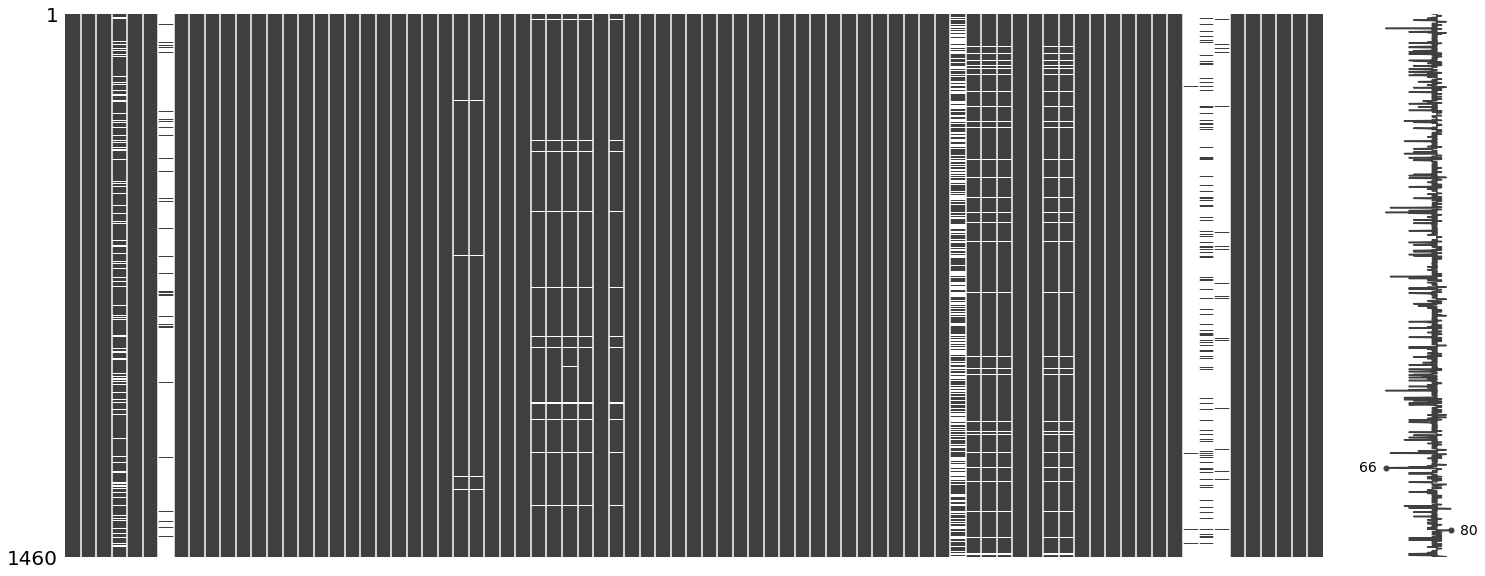

In [ ]:
msno.matrix(train);

In [ ]:
cols = train.select_dtypes('object').columns
for col in cols:
  if train[col].isna().sum() > 0:
    train[f'{col}_faltante'] = np.where(train[col].isna(), 1, 0)
    train[col] = train[col].fillna('MISSING')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,MISSING,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,MISSING,Attchd,RFn,TA,TA,Y,MISSING,MISSING,MISSING,WD,Normal
1,RL,Pave,MISSING,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,MISSING,MISSING,MISSING,WD,Normal
2,RL,Pave,MISSING,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,MISSING,MISSING,MISSING,WD,Normal


In [ ]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LotShape_faltante,LandContour_faltante,Utilities_faltante,LotConfig_faltante,LandSlope_faltante,Neighborhood_faltante,Condition1_faltante,Condition2_faltante,BldgType_faltante,HouseStyle_faltante,RoofStyle_faltante,RoofMatl_faltante,Exterior1st_faltante,Exterior2nd_faltante,MasVnrType_faltante,ExterQual_faltante,ExterCond_faltante,Foundation_faltante,BsmtQual_faltante,BsmtCond_faltante,BsmtExposure_faltante,BsmtFinType1_faltante,BsmtFinType2_faltante,Heating_faltante,HeatingQC_faltante,CentralAir_faltante,Electrical_faltante,KitchenQual_faltante,Functional_faltante,FireplaceQu_faltante,GarageType_faltante,GarageFinish_faltante,GarageQual_faltante,GarageCond_faltante,PavedDrive_faltante,PoolQC_faltante,Fence_faltante,MiscFeature_faltante,SaleType_faltante,SaleCondition_faltante
0,1.0,60.0,RL,65.0,8450.0,Pave,MISSING,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0
1,2.0,20.0,RL,80.0,9600.0,Pave,MISSING,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
2,3.0,60.0,RL,68.0,11250.0,Pave,MISSING,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [ ]:
cols = train.select_dtypes('number').columns
knn = KNNImputer()
train[cols] = knn.fit_transform(train[cols])
train[cols].isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### 3. Codificando variáveis categóricas

A) Mean encoding

B) Rare labels

C) Weight of Evidence

https://www.kaggle.com/c/titanic

In [ ]:
titanic = pd.read_csv('train_titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
mean_encoder = ce.MeanCategoricalEncoder(variables='Embarked')

train_mean = mean_encoder.fit_transform(titanic, titanic['Survived'])

mean_encoder.encoder_dict_

{'Embarked': {'C': 0.5535714285714286,
  'MISSING': 1.0,
  'Q': 0.38961038961038963,
  'S': 0.33695652173913043}}

In [ ]:
woe_encoder = ce.WoERatioCategoricalEncoder(variables='Sex')

train_woe = woe_encoder.fit_transform(titanic, titanic['Survived'])

woe_encoder.encoder_dict_

{'Sex': {'female': 1.5298770033401874, 'male': -0.9838327092415774}}

In [ ]:
titles = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
titles.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Capt              1
 Don               1
 Lady              1
 Ms                1
 Mme               1
 Sir               1
 the Countess      1
 Jonkheer          1
Name: Name, dtype: int64

In [ ]:
count = titles.value_counts()
titles = np.where(count < 3, 'Other', count.index)
titles

array([' Mr', ' Miss', ' Mrs', ' Master', ' Dr', ' Rev', 'Other', 'Other',
       'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other',
       'Other', 'Other'], dtype=object)

### 4. Padronização

A) Robust Scaler

B) Log transform

C) Box-Cox

In [ ]:
rs = RobustScaler()

train_cp = train.copy(deep=True)
train_num = train.select_dtypes('number').columns
train_cp[train_num] = rs.fit_transform(train[train_num])

train_cp[train_num].head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_faltante,Street_faltante,...,LotShape_faltante,LandContour_faltante,Utilities_faltante,LotConfig_faltante,LandSlope_faltante,Neighborhood_faltante,Condition1_faltante,Condition2_faltante,BldgType_faltante,HouseStyle_faltante,RoofStyle_faltante,RoofMatl_faltante,Exterior1st_faltante,Exterior2nd_faltante,MasVnrType_faltante,ExterQual_faltante,ExterCond_faltante,Foundation_faltante,BsmtQual_faltante,BsmtCond_faltante,BsmtExposure_faltante,BsmtFinType1_faltante,BsmtFinType2_faltante,Heating_faltante,HeatingQC_faltante,CentralAir_faltante,Electrical_faltante,KitchenQual_faltante,Functional_faltante,FireplaceQu_faltante,GarageType_faltante,GarageFinish_faltante,GarageQual_faltante,GarageCond_faltante,PavedDrive_faltante,PoolQC_faltante,Fence_faltante,MiscFeature_faltante,SaleType_faltante,SaleCondition_faltante
0,-1.000000,0.2,-0.247525,-0.254076,0.5,0.0,0.652174,0.243243,1.180723,0.452790,0.0,-0.559829,-0.269652,-0.453608,1.173077,0.0,0.380070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.595238,0.0,0.281573,0.00000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.541506,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.998629,-0.6,0.495050,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,-0.330769,0.538308,0.343643,0.000000,0.0,-0.312090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.047619,0.0,-0.082816,1.77381,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.220173,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.997258,0.2,-0.099010,0.437624,0.5,0.0,0.608696,0.216216,0.975904,0.143910,0.0,-0.074359,-0.142289,-0.327933,1.189560,0.0,0.497489,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.547619,0.0,0.530021,0.00000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.720024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_cp = train.copy(deep=True)
train_cp[train_num] = np.log(train[train_num])

train_cp[train_num].head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_faltante,Street_faltante,...,LotShape_faltante,LandContour_faltante,Utilities_faltante,LotConfig_faltante,LandSlope_faltante,Neighborhood_faltante,Condition1_faltante,Condition2_faltante,BldgType_faltante,HouseStyle_faltante,RoofStyle_faltante,RoofMatl_faltante,Exterior1st_faltante,Exterior2nd_faltante,MasVnrType_faltante,ExterQual_faltante,ExterCond_faltante,Foundation_faltante,BsmtQual_faltante,BsmtCond_faltante,BsmtExposure_faltante,BsmtFinType1_faltante,BsmtFinType2_faltante,Heating_faltante,HeatingQC_faltante,CentralAir_faltante,Electrical_faltante,KitchenQual_faltante,Functional_faltante,FireplaceQu_faltante,GarageType_faltante,GarageFinish_faltante,GarageQual_faltante,GarageCond_faltante,PavedDrive_faltante,PoolQC_faltante,Fence_faltante,MiscFeature_faltante,SaleType_faltante,SaleCondition_faltante
0,0.000000,4.094345,4.174387,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,-inf,5.010635,6.752270,6.752270,6.749931,-inf,7.444249,0.0,-inf,0.693147,0.0,1.098612,0.0,2.079442,-inf,7.602401,0.693147,6.306275,-inf,4.110874,-inf,-inf,-inf,-inf,-inf,0.693147,7.604894,12.247694,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf
1,0.693147,2.995732,4.382027,9.169518,1.791759,2.079442,7.588830,7.588830,-inf,6.885510,-inf,5.648974,7.140453,7.140453,-inf,-inf,7.140453,-inf,0.0,0.693147,-inf,1.098612,0.0,1.791759,0.0,7.588830,0.693147,6.131226,5.697093,-inf,-inf,-inf,-inf,-inf,-inf,1.609438,7.604396,12.109011,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf
2,1.098612,4.094345,4.219508,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,-inf,6.073045,6.824374,6.824374,6.763885,-inf,7.487734,0.0,-inf,0.693147,0.0,1.098612,0.0,1.791759,0.0,7.601402,0.693147,6.410175,-inf,3.737670,-inf,-inf,-inf,-inf,-inf,2.197225,7.604894,12.317167,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0,0.0,0.0,-inf,-inf


Essa transformação também pode ser feita através do PowerTransform do sklearn ou da biblioteca feature-engine

In [ ]:
train_cp = train.copy(deep=True)
train_cp['LotFrontage'], param = stats.boxcox(train['LotFrontage'])
train_cp['LotFrontage']

0       11.856781
1       13.197111
2       12.137812
3       11.371635
4       13.530048
          ...    
1455    11.568333
1456    13.611877
1457    11.951256
1458    12.137812
1459    12.767446
Name: LotFrontage, Length: 1460, dtype: float64

### 5. Discretização com K-Means

In [ ]:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='kmeans')
lot_kbins = disc.fit_transform(train[['LotFrontage']])
lot_kbins

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:184: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([[2.],
       [3.],
       [2.],
       ...,
       [2.],
       [2.],
       [3.]])

### 6. Tratamento de outliers

In [ ]:
cols = train.select_dtypes('number').columns.tolist()
w = Winsorizer(distribution='gaussian', variables=cols)
train_w = w.fit_transform(train)
 
print(w.left_tail_caps_)
print(w.right_tail_caps_)

{}
{'Id': 1995.3300281065438, 'MSSubClass': 183.79897325540367, 'LotFrontage': 140.73914537338123, 'LotArea': 40460.62287932922, 'OverallQual': 10.248304708717928, 'OverallCond': 8.913740475891634, 'YearBuilt': 2061.8765203467538, 'YearRemodAdd': 2046.8019738477856, 'MasVnrArea': 646.3899534544438, 'BsmtFinSF1': 1811.9339985501708, 'BsmtFinSF2': 530.5071334881148, 'BsmtUnfSF': 1892.8412768362068, 'TotalBsmtSF': 2373.545425433206, '1stFlrSF': 2322.3899264519887, '2ndFlrSF': 1656.577773412202, 'LowQualFinSF': 151.71376484850256, 'GrLivArea': 3091.904848899745, 'BsmtFullBath': 1.9820742840228223, 'BsmtHalfBath': 0.7737921854129653, 'FullBath': 3.2178158970369806, 'HalfBath': 1.8915328556074589, 'BedroomAbvGr': 5.313772488597047, 'KitchenAbvGr': 1.7075899376178425, 'TotRmsAbvGrd': 11.393988090930275, 'Fireplaces': 2.5470128575668403, 'GarageYrBlt': 2051.4233159984738, 'GarageCars': 4.009068318004568, 'GarageArea': 1114.3946613464436, 'WoodDeckSF': 470.26090360311593, 'OpenPorchSF': 245.428